In [1]:
!pip install matplotlib

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
array = [('Ireland', 'United Kingdom'),
 ('Armenia', 'Georgia'),
 ('Armenia', 'Turkey'),
 ('Albania', 'Greece'),
 ('Albania', 'Kosovo'),
 ('Albania', 'North Macedonia'),
 ('Albania', 'Montenegro'),
 ('Andorra', 'France'),
 ('Andorra', 'Spain'),
 ('Austria', 'Czech Republic'),
 ('Austria', 'Germany'),
 ('Austria', 'Hungary'),
 ('Austria', 'Italy'),
 ('Austria', 'Liechtenstein'),
 ('Austria', 'Slovakia'),
 ('Austria', 'Slovenia'),
 ('Austria', 'Switzerland'),
 ('Belarus', 'Latvia'),
 ('Belarus', 'Lithuania'),
 ('Belarus', 'Poland'),
 ('Belarus', 'Russia'),
 ('Belarus', 'Ukraine'),
 ('Belgium', 'France'),
 ('Belgium', 'Germany'),
 ('Belgium', 'Luxembourg'),
 ('Belgium', 'Netherlands'),
 ('BIH', 'Croatia'),
 ('BIH', 'Montenegro'),
 ('BIH', 'Serbia'),
 ('Bulgaria', 'Greece'),
 ('Bulgaria', 'North Macedonia'),
 ('Bulgaria', 'Romania'),
 ('Bulgaria', 'Serbia'),
 ('Bulgaria', 'Turkey'),
 ('Croatia', 'Hungary'),
 ('Croatia', 'Montenegro'),
 ('Croatia', 'Serbia'),
 ('Croatia', 'Slovenia'),
 ('Czech Republic', 'Germany'),
 ('Czech Republic', 'Poland'),
 ('Czech Republic', 'Slovakia'),
 ('Denmark', 'Germany'),
 ('Estonia', 'Latvia'),
 ('Estonia', 'Russia'),
 ('Finland', 'Norway'),
 ('Finland', 'Sweden'),
 ('Finland', 'Russia'),
 ('France', 'Germany'),
 ('France', 'Italy'),
 ('France', 'Luxembourg'),
 ('France', 'Monaco'),
 ('France', 'Spain'),
 ('France', 'Switzerland'),
 ('Germany', 'Luxembourg'),
 ('Germany', 'Netherlands'),
 ('Germany', 'Poland'),
 ('Germany', 'Switzerland'),
 ('Georgia', 'Russia'),
 ('Georgia', 'Turkey'),
 ('Greece', 'Turkey'),
 ('Greece', 'North Macedonia'),
 ('Hungary', 'Romania'),
 ('Hungary', 'Serbia'),
 ('Hungary', 'Slovakia'),
 ('Hungary', 'Slovenia'),
 ('Hungary', 'Ukraine'),
 ('Italy', 'San Marino'),
 ('Italy', 'Slovenia'),
 ('Italy', 'Switzerland'),
 ('Italy', 'Vatican City'),
 ('Kosovo', 'Montenegro'),
 ('Kosovo', 'North Macedonia'),
 ('Kosovo', 'Serbia'),
 ('Latvia', 'Lithuania'),
 ('Latvia', 'Russia'),
 ('Switzerland', 'Liechtenstein'),
 ('Lithuania', 'Poland'),
 ('Lithuania', 'Russia'),
 ('Moldova', 'Romania'),
 ('Moldova', 'Ukraine'),
 ('Montenegro', 'Serbia'),
 ('North Macedonia', 'Serbia'),
 ('Norway', 'Sweden'),
 ('Norway', 'Russia'),
 ('Poland', 'Russia'),
 ('Poland', 'Slovakia'),
 ('Poland', 'Ukraine'),
 ('Portugal', 'Spain'),
 ('Romania', 'Serbia'),
 ('Romania', 'Ukraine'),
 ('Russia', 'Ukraine'),
 ('Slovakia', 'Ukraine')]

#Bosnia and Herzegovina была для удобства заменена абревиатурой BIH

# (a) Draw3 G* with the minimum number of intersecting edges

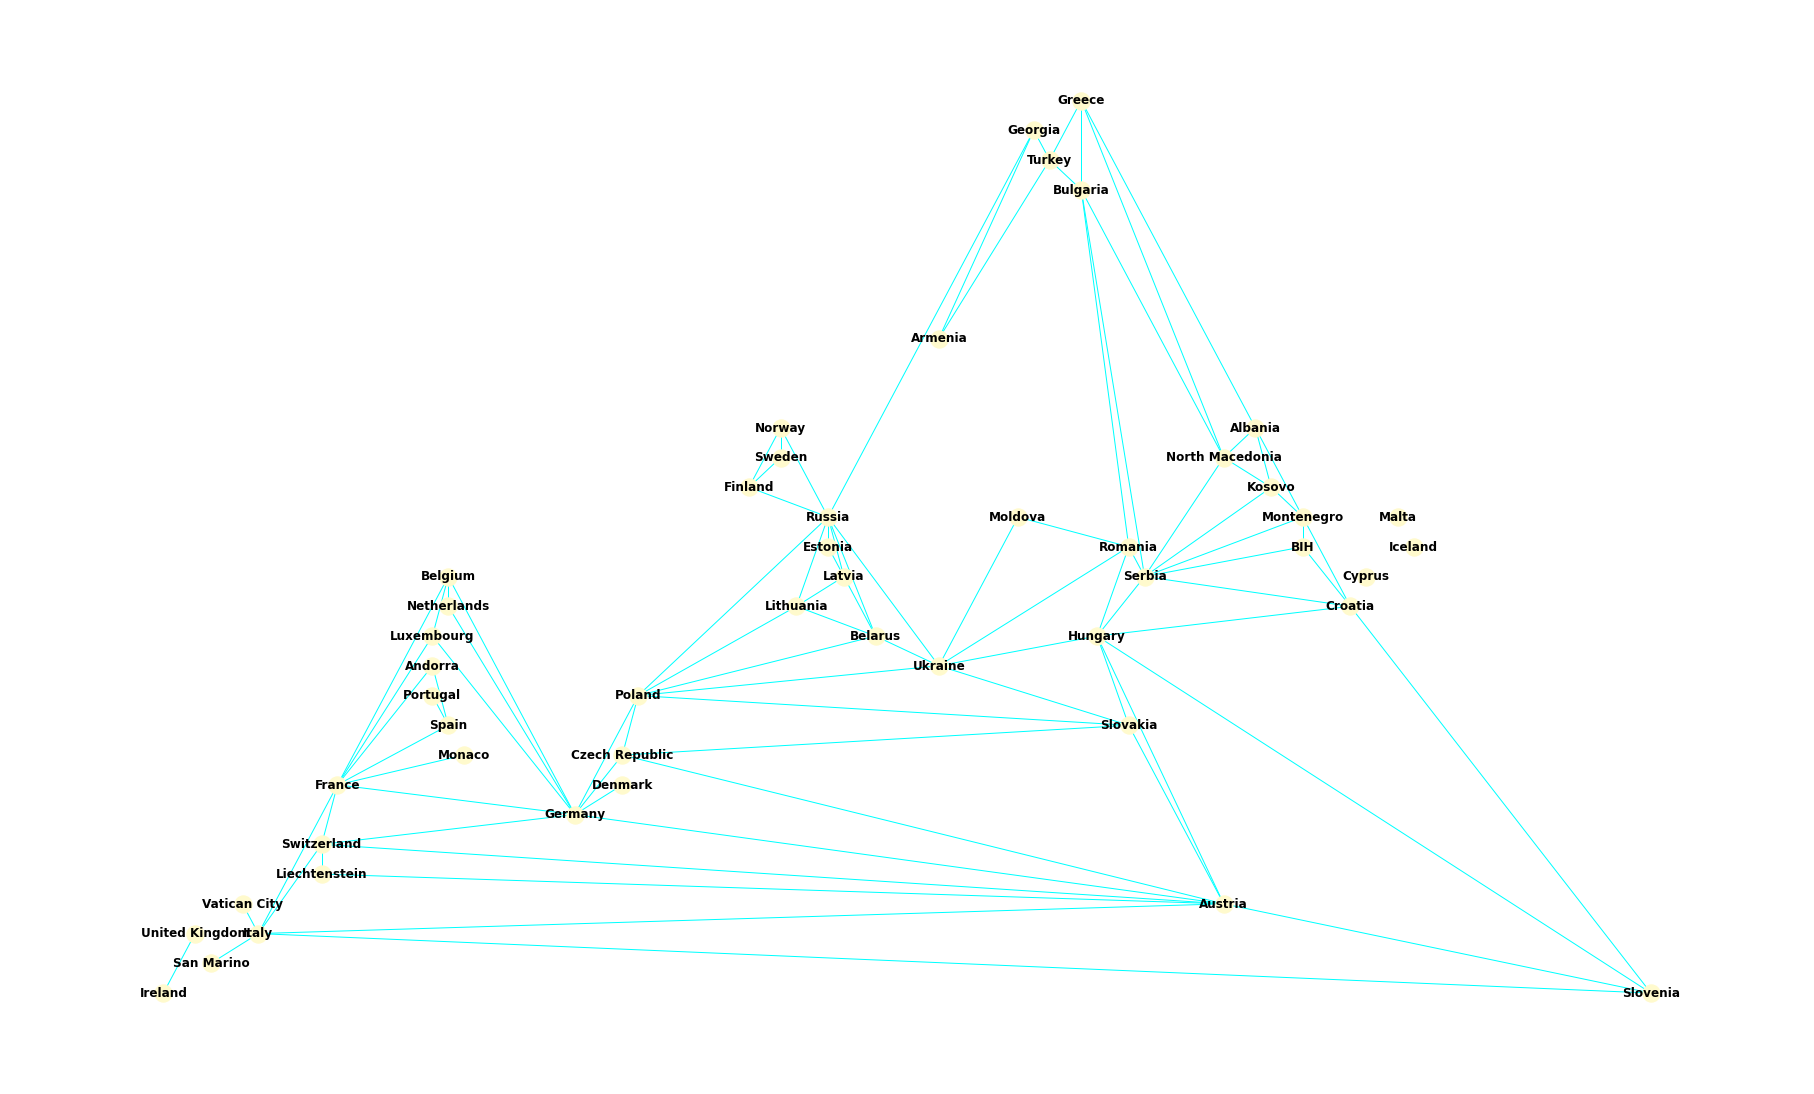

In [4]:
plt.figure(figsize = (25,15))
G = nx.Graph()
G.add_edges_from(array)
G.add_node("Iceland")
G.add_node("Malta")
G.add_node("Cyprus")
nx.draw_planar(G, with_labels=True, font_weight='bold', node_color = 'lemonchiffon', edge_color = 'cyan')

# (b) Find |𝑉 |, |𝐸|, 𝛿 (G), Δ(G), rad(G), diam(G), girth(G), center(G), 𝜘(G), 𝜆(G).

In [5]:
#components = nx.component(G)

component = nx.node_connected_component(G,"Italy")
largest_component = nx.subgraph(G, component)
arr_degrees = nx.degree(largest_component)
max_a = 0
for el in arr_degrees:
    if max_a < el[1]:
        max_a = el[1]
        buf_max = el
min_a = max_a
for el in arr_degrees:
    if min_a > el[1]:
        min_a = el[1]
        buf_min = el
print("|𝑉| =", len(list(largest_component.nodes)))
print("|𝐸| =", len(list(largest_component.edges)))
print("𝛿(G) =", buf_min)
print("Δ(G) =", buf_max)
print("rad(G) =", nx.radius(largest_component))
print("diam(G) =", nx.diameter(largest_component))
shortest_cycle = nx.cycle_basis(largest_component)
min_len = 1000
for i in shortest_cycle:
    if min_len > len(i):
        min_len = len(i)
print("girth(G) =", min_len)
center_nodes = nx.center(largest_component)
print("center(G) ={")
for i in center_nodes:
    print(i)
print("}")
print("𝜘(G) =",nx.node_connectivity(largest_component))
print("𝜆(G) =",nx.edge_connectivity(largest_component))
#nx.line_graph(largest_component)
#pd.DataFrame(center_nodes)
#plt.figure(figsize = (10,10))
#nx.draw_planar(largest_component, node_color=[vertex_coloring[node] for node in largest_component.nodes()], with_labels=True)

|𝑉| = 44
|𝐸| = 91
𝛿(G) = ('Denmark', 1)
Δ(G) = ('Germany', 9)
rad(G) = 5
diam(G) = 8
girth(G) = 3
center(G) ={
Austria
Czech Republic
Germany
Hungary
Slovakia
Slovenia
Switzerland
Belarus
Lithuania
Poland
Russia
Ukraine
Croatia
}
𝜘(G) = 1
𝜆(G) = 1


# (c) Find the minimum vertex coloring 𝑍 : 𝑉 → N of G.

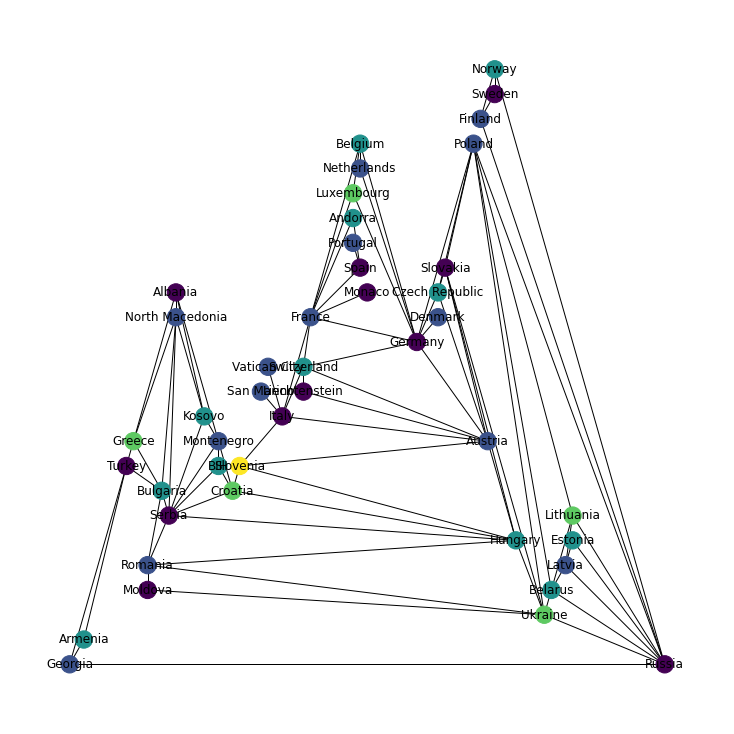

In [6]:
vertex_coloring = nx.greedy_color(largest_component)
plt.figure(figsize = (10,10))
nx.draw_planar(largest_component, node_color=[vertex_coloring[node] for node in largest_component.nodes()], with_labels=True)

# (d) Find the minimum edge coloring 𝑋 : 𝐸 → N of G

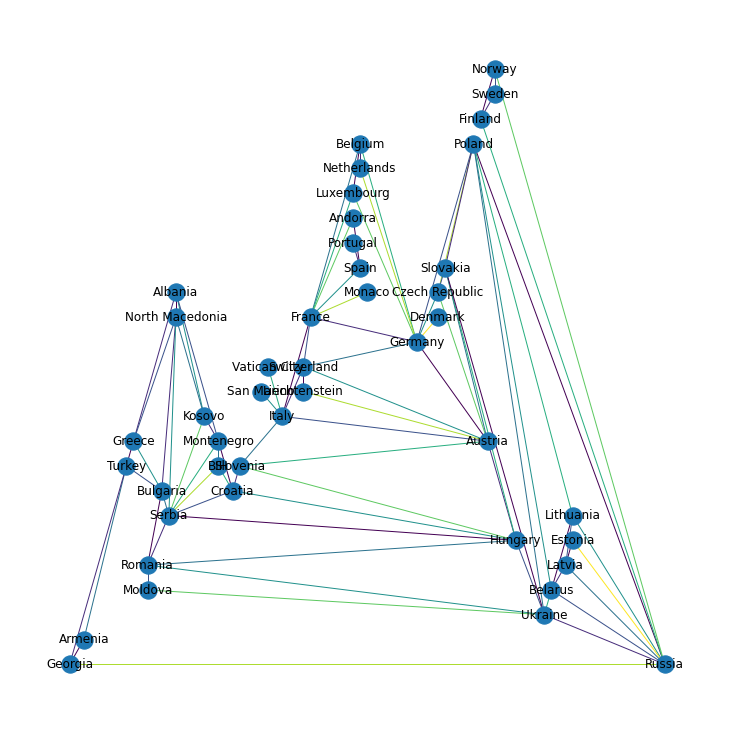

In [7]:
edge_graph = nx.line_graph(largest_component)
edge_coloring = nx.greedy_color(edge_graph)
plt.figure(figsize = (10,10))
nx.draw_planar(largest_component, edge_color=[edge_coloring[node] for node in largest_component.edges()], with_labels=True)

# (e) Find the maximum clique 𝑄 ⊆ 𝑉 of G.

In [8]:
max_clique = nx.find_cliques(largest_component)
max_len = 0;
for el in max_clique:
    if len(el)>max_len:
        maximal_clique = el
        max_len = len(el)
print("maximum clique:",maximal_clique)

maximum clique: ['Serbia', 'Montenegro', 'Croatia', 'BIH']


# (f) Find the maximum stable set 𝑆 ⊆ 𝑉 of G.

In [9]:
maximum_stable_set = nx.algorithms.approximation.clique.maximum_independent_set(largest_component)
print("maximum stable set:", maximum_stable_set)

maximum stable set: {'Albania', 'Denmark', 'Armenia', 'Belarus', 'Monaco', 'Belgium', 'Moldova', 'San Marino', 'Andorra', 'Austria', 'Finland', 'BIH', 'Bulgaria', 'Vatican City', 'Portugal', 'Estonia'}


# (g) Find the maximum matching 𝑀 ⊆ 𝐸 of G.

In [10]:
maximum_matching = nx.max_weight_matching(largest_component)
print("maximum matching:",maximum_matching)

maximum matching: {('Switzerland', 'Liechtenstein'), ('North Macedonia', 'Albania'), ('Monaco', 'France'), ('Turkey', 'Armenia'), ('Norway', 'Russia'), ('Moldova', 'Romania'), ('Serbia', 'Kosovo'), ('Estonia', 'Latvia'), ('Vatican City', 'Italy'), ('Ukraine', 'Belarus'), ('BIH', 'Montenegro'), ('Portugal', 'Spain'), ('Czech Republic', 'Austria'), ('Sweden', 'Finland'), ('Poland', 'Lithuania'), ('Hungary', 'Slovakia'), ('Netherlands', 'Belgium'), ('Croatia', 'Slovenia'), ('Denmark', 'Germany'), ('Bulgaria', 'Greece')}


# (h) Find the minimum vertex cover 𝑅 ⊆ 𝑉 of G.


In [11]:
minimum_vertex_cover = nx.algorithms.approximation.vertex_cover.min_weighted_vertex_cover(largest_component)
print("minimum vertex cover:")
print(minimum_vertex_cover)

minimum vertex cover:
{'Poland', 'Slovakia', 'Spain', 'Andorra', 'France', 'Georgia', 'Serbia', 'North Macedonia', 'Latvia', 'Greece', 'Czech Republic', 'Kosovo', 'Hungary', 'Liechtenstein', 'Moldova', 'Croatia', 'Ukraine', 'Finland', 'Turkey', 'Lithuania', 'Belarus', 'Belgium', 'Austria', 'Italy', 'Bulgaria', 'Germany', 'Albania', 'Russia', 'Norway', 'Armenia', 'Montenegro'}


# (i) Find the minimum edge cover 𝐹 ⊆ 𝐸 of G.

In [12]:
minimum_edge_cover = nx.algorithms.covering.min_edge_cover(largest_component)
print("minimum edge cover:")
print(minimum_edge_cover)

minimum edge cover:
{('Andorra', 'France'), ('Switzerland', 'Liechtenstein'), ('Belgium', 'Luxembourg'), ('North Macedonia', 'Albania'), ('Monaco', 'France'), ('Turkey', 'Armenia'), ('Luxembourg', 'Belgium'), ('Norway', 'Russia'), ('Moldova', 'Romania'), ('Serbia', 'Kosovo'), ('Estonia', 'Latvia'), ('Armenia', 'Georgia'), ('Vatican City', 'Italy'), ('Ukraine', 'Belarus'), ('BIH', 'Montenegro'), ('France', 'Andorra'), ('Portugal', 'Spain'), ('San Marino', 'Italy'), ('Czech Republic', 'Austria'), ('Sweden', 'Finland'), ('Poland', 'Lithuania'), ('Hungary', 'Slovakia'), ('Italy', 'San Marino'), ('Netherlands', 'Belgium'), ('Georgia', 'Armenia'), ('Croatia', 'Slovenia'), ('Denmark', 'Germany'), ('Bulgaria', 'Greece')}


# (j) Find the shortest closed walk 𝑊 that visits every vertex of G.

In [13]:
visits_every_vertex_walk = nx.approximation.traveling_salesman_problem(largest_component)
print("shortest closed walk 𝑊 that visits every vertex of G:")
print(visits_every_vertex_walk)

shortest closed walk 𝑊 that visits every vertex of G:
['Armenia', 'Turkey', 'Bulgaria', 'Greece', 'Albania', 'North Macedonia', 'Serbia', 'Kosovo', 'Montenegro', 'BIH', 'Croatia', 'Hungary', 'Romania', 'Moldova', 'Ukraine', 'Hungary', 'Austria', 'Slovenia', 'Austria', 'Slovakia', 'Austria', 'Liechtenstein', 'Switzerland', 'France', 'Monaco', 'France', 'Luxembourg', 'Germany', 'Denmark', 'Germany', 'Netherlands', 'Belgium', 'France', 'Italy', 'Vatican City', 'Italy', 'San Marino', 'Italy', 'France', 'Spain', 'Portugal', 'Spain', 'Andorra', 'France', 'Germany', 'Czech Republic', 'Poland', 'Belarus', 'Lithuania', 'Latvia', 'Estonia', 'Russia', 'Norway', 'Sweden', 'Finland', 'Russia', 'Georgia', 'Armenia']


# (k) Find the shortest closed walk 𝑈 that visits every edge of G.

In [14]:
visits_every_edges_walk = nx.eulerian_circuit(nx.eulerize(largest_component))
print("shortest closed walk 𝑈 that visits every edge of G:")
for i in visits_every_edges_walk:
    print(i)

shortest closed walk 𝑈 that visits every edge of G:
('Armenia', 'Turkey')
('Turkey', 'Greece')
('Greece', 'North Macedonia')
('North Macedonia', 'Bulgaria')
('Bulgaria', 'Romania')
('Romania', 'Moldova')
('Moldova', 'Ukraine')
('Ukraine', 'Russia')
('Russia', 'Norway')
('Norway', 'Sweden')
('Sweden', 'Finland')
('Finland', 'Norway')
('Norway', 'Finland')
('Finland', 'Russia')
('Russia', 'Poland')
('Poland', 'Ukraine')
('Ukraine', 'Belarus')
('Belarus', 'Poland')
('Poland', 'Lithuania')
('Lithuania', 'Russia')
('Russia', 'Latvia')
('Latvia', 'Lithuania')
('Lithuania', 'Belarus')
('Belarus', 'Russia')
('Russia', 'Estonia')
('Estonia', 'Latvia')
('Latvia', 'Belarus')
('Belarus', 'Poland')
('Poland', 'Slovakia')
('Slovakia', 'Ukraine')
('Ukraine', 'Romania')
('Romania', 'Serbia')
('Serbia', 'Croatia')
('Croatia', 'BIH')
('BIH', 'Serbia')
('Serbia', 'Hungary')
('Hungary', 'Ukraine')
('Ukraine', 'Romania')
('Romania', 'Hungary')
('Hungary', 'Slovakia')
('Slovakia', 'Czech Republic')
('Czech 

# (l) Find all biconnected components (blocks) and draw the block-cut tree of G*

In [15]:
biconnected_components = nx.biconnected_components(G)
print("biconnected components:")
a = 1
max_len = 0
for i in biconnected_components:
    print(a, i)
    a = a + 1

biconnected components:
1 {'Ireland', 'United Kingdom'}
2 {'Portugal', 'Spain'}
3 {'Spain', 'Andorra', 'France'}
4 {'Italy', 'San Marino'}
5 {'Vatican City', 'Italy'}
6 {'Monaco', 'France'}
7 {'Germany', 'Denmark'}
8 {'Norway', 'Finland', 'Sweden', 'Russia'}
9 {'Slovenia', 'Poland', 'Slovakia', 'France', 'Luxembourg', 'Georgia', 'Serbia', 'BIH', 'Latvia', 'North Macedonia', 'Greece', 'Czech Republic', 'Kosovo', 'Netherlands', 'Hungary', 'Switzerland', 'Liechtenstein', 'Moldova', 'Croatia', 'Ukraine', 'Turkey', 'Estonia', 'Lithuania', 'Belarus', 'Belgium', 'Austria', 'Italy', 'Bulgaria', 'Albania', 'Germany', 'Russia', 'Armenia', 'Montenegro', 'Romania'}


![jupyter](./Block-cut_tree.png)

# (m)Find all 2-edge-connected components of G*.

In [16]:
biconnected_component_edges = nx.biconnected_component_edges(G)
print("2-edge-connected components:")
a = 1
for i in biconnected_component_edges:
    print(a, i)
    a = a + 1

2-edge-connected components:
1 [('Ireland', 'United Kingdom')]
2 [('Spain', 'Portugal')]
3 [('France', 'Andorra'), ('Andorra', 'Spain'), ('Spain', 'France')]
4 [('Italy', 'San Marino')]
5 [('Italy', 'Vatican City')]
6 [('France', 'Monaco')]
7 [('Germany', 'Denmark')]
8 [('Russia', 'Finland'), ('Finland', 'Norway'), ('Norway', 'Sweden'), ('Sweden', 'Finland'), ('Norway', 'Russia')]
9 [('Armenia', 'Georgia'), ('Georgia', 'Russia'), ('Russia', 'Belarus'), ('Belarus', 'Latvia'), ('Latvia', 'Estonia'), ('Estonia', 'Russia'), ('Latvia', 'Lithuania'), ('Lithuania', 'Belarus'), ('Lithuania', 'Poland'), ('Poland', 'Belarus'), ('Poland', 'Czech Republic'), ('Czech Republic', 'Austria'), ('Austria', 'Germany'), ('Germany', 'Belgium'), ('Belgium', 'France'), ('France', 'Germany'), ('France', 'Italy'), ('Italy', 'Austria'), ('Italy', 'Slovenia'), ('Slovenia', 'Austria'), ('Slovenia', 'Croatia'), ('Croatia', 'BIH'), ('BIH', 'Montenegro'), ('Montenegro', 'Albania'), ('Albania', 'Greece'), ('Greece', 

# (n) Construct an SPQR tree of the largest biconnected component of G.
С помощью SageMath было построено SPQR дерево. https://sagecell.sagemath.org/?z=eJx9lMFu2zAMhu8F-g6-KQWMPUCBHbpiS4clw5Btp8IwFIewhdhSRknZmmHvPkqRbCbudrJFiuTPj7RblIeueFssw3PxWzzgAFpJcV88i28e9_AiSrEEgy0Zq1I89FsZ_c9iiQANkPsr4JZMpfhkrDkaevls0HX1WjawMzoFeuuQXouQeQk4SB1SP56g6eoNHPy2V01I1puj3Md0T163El-SMcoqxUcn-2j6qdwJsJd6R6eVojQOtHWgNJW7vRHvoJfobVC68dbG4O97lEoHzV9MjpTuGH0r5Tovk1oKbpUfQvAHlDq2OYle-V8wbI3HNvQKrjvrsDHSWMpR07F-AjxBa45Kn3k-opEu1hqJrY0m1dCiibG-p4YjJE4_c76mWoqNGaTmGWPnuQ4lYQhfKcnAVrNR3PMxsakkchTw3rqoo-CIE09yJ3DkvODFkvIRku7zaKvpCoWOc7qa938mkLeVq0owq5EmOec4p1uZG11jrU_rMwN_gXLsJYRf6Oa809cS7uQcc0mXC5LgBuDTupa5zer6Oyiu6ld8yzncKcHa9DvqN8Ibe8x9x86Yokl6VRYz8QV351r_BDoqyGULDmZSkG-SlxnHnNz85-72pk3_t_h840zt9U4hNA52C3I72obRaw8_sA6W4Dn0xi3C4e4vemW3aQ==&lang=sage&interacts=eJyLjgUAARUAuQ==
![jupyter](./SPQR.png)


# (o) Add the weight function𝑤 : 𝐸 → R denoting the distance5 between capitals. Find the minimum (w.r.t. the total weight of edges) spanning tree 𝑇 for the largest connected component of the weighted Europe graph G* 𝑤 = (𝑉 , 𝐸,𝑤).

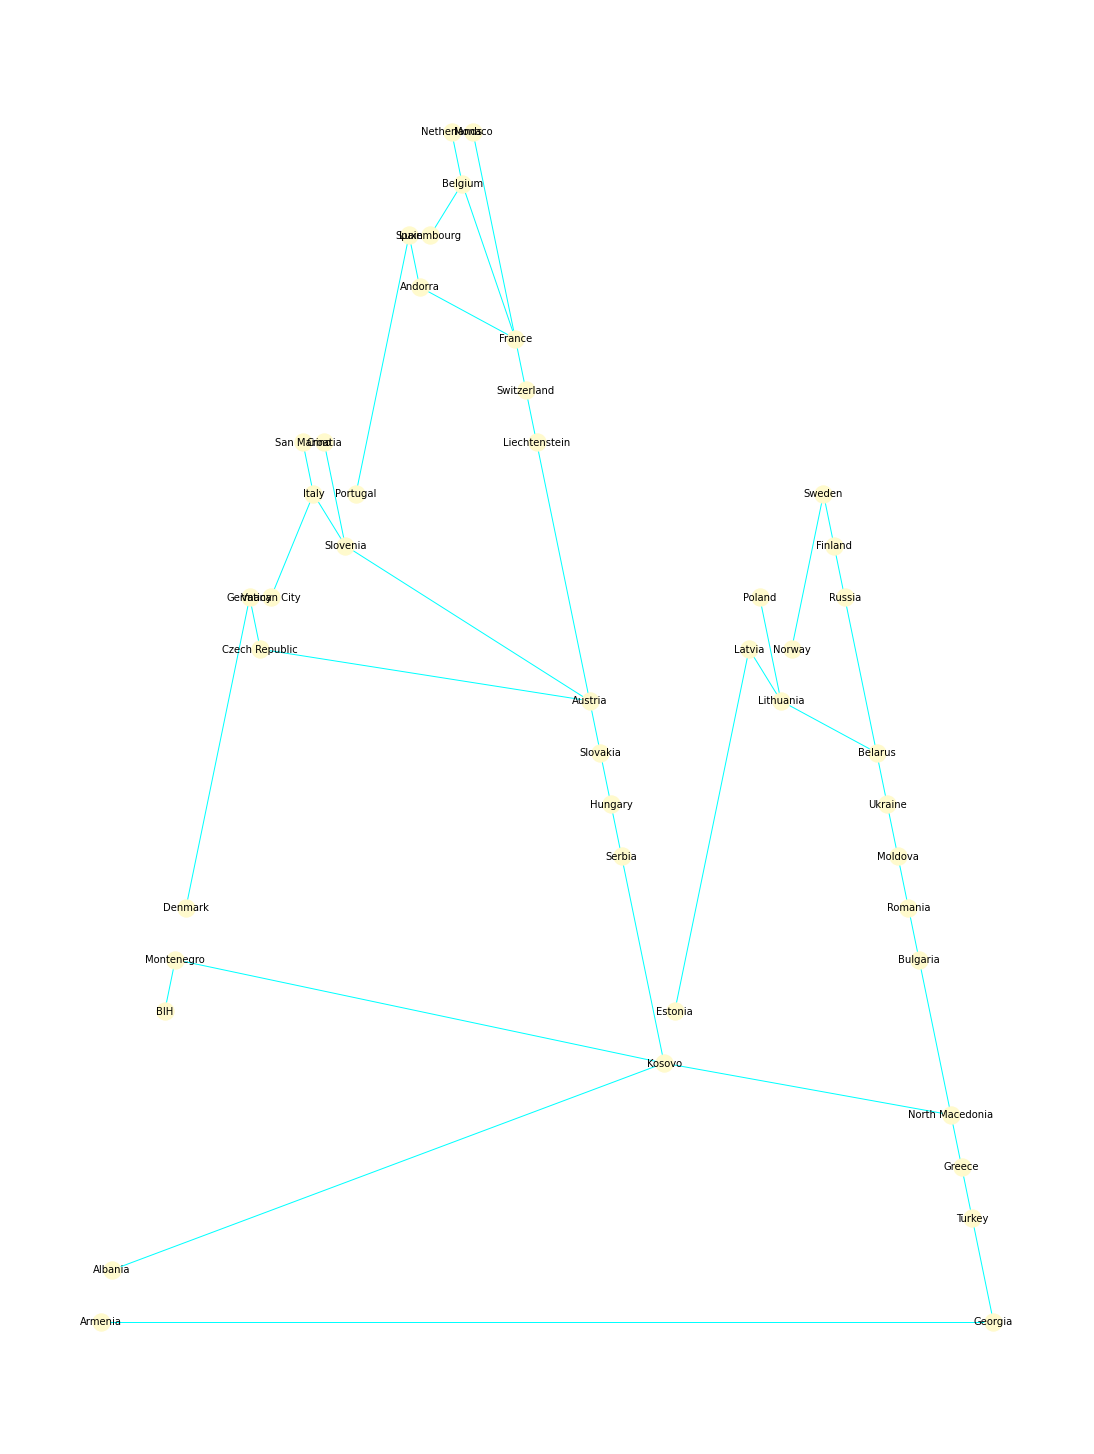

In [17]:
weighted_edges = [("Albania","Greece",653),
("Albania","North Macedonia",243),
("Albania","Montenegro",153),
("Greece","Bulgaria",731),
("Greece","Turkey",975),
("Greece","North Macedonia",634),
("North Macedonia","Bulgaria",212),
("North Macedonia","Serbia",431),
("Montenegro","BIH",245),
("Montenegro","Croatia",595),
("Montenegro","Serbia",412),
("Andorra","France",848),
("Andorra","Spain",608),
("France","Belgium",283),
("France","Germany",989),
("France","Italy",1369),
("France","Luxembourg",330),
("France","Monaco",852),
("France","Netherlands",480),
("France","Spain",1200),
("France","Switzerland",509),
("Spain","Portugal",596),
("Spain","United Kingdom",1504),
("Armenia","Azerbaijan",596),
("Armenia","Georgia",262),
("Armenia","Turkey",1364),
("Azerbaijan","Georgia",540),
("Azerbaijan","Russia",2772),
("Azerbaijan","Turkey",1821),
("Georgia","Russia",2242),
("Georgia","Turkey",1329),
("Turkey","Bulgaria",989),
("Austria","Czech Republic",287),
("Austria","Germany",586),
("Austria","Hungary",241),
("Austria","Italy",1032),
("Austria","Liechtenstein",612),
("Austria","Slovakia",64),
("Austria","Slovenia",343),
("Austria","Switzerland",785),
("Czech Republic","Germany",324),
("Czech Republic","Poland",580),
("Czech Republic","Slovakia",327),
("Germany","Belgium",715),
("Germany","Denmark",420),
("Germany","Luxembourg",676),
("Germany","Netherlands",639),
("Germany","Poland",552),
("Germany","Switzerland",859),
("Hungary","Croatia",344),
("Hungary","Romania",763),
("Hungary","Serbia",350),
("Hungary","Slovakia",185),
("Hungary","Slovenia",438),
("Hungary","Ukraine",1062),
("Italy","San Marino",297),
("Italy","Slovenia",709),
("Italy","Switzerland",950),
("Italy","Vatican City",5),
("Liechtenstein","Switzerland",199),
("Slovakia","Poland",607),
("Slovakia","Ukraine",1169),
("Slovenia","Croatia",140),
("Russia","Belarus",739),
("Russia","Estonia",1003),
("Russia","Finland",1091),
("Russia","Kazakhstan",2636),
("Russia","Latvia",907),
("Russia","Lithuania",877),
("Russia","Norway",1896),
("Russia","Poland",1262),
("Russia","Ukraine",840),
("Belarus","Latvia",452),
("Belarus","Lithuania",189),
("Belarus","Poland",535),
("Belarus","Ukraine",529),
("Latvia","Estonia",306),
("Latvia","Lithuania",291),
("Lithuania","Poland",434),
("Poland","Ukraine",750),
("Ukraine","Moldova",463),
("Ukraine","Romania",874),
("Belgium","Luxembourg",197),
("Belgium","Netherlands",201),
("BIH","Croatia",362),
("BIH","Serbia",260),
("Croatia","Serbia",421),
("Serbia","Bulgaria",422),
("Serbia","Romania",577),
("Bulgaria","Romania",354),
("Romania","Moldova",425),
("Cyprus","United Kingdom",2369),
("United Kingdom","Ireland",531),
("Finland","Norway",964),
("Finland","Sweden",486),
("Norway","Sweden",417)]

G.add_weighted_edges_from(weighted_edges)
weighted_largest_component = nx.subgraph(G, component)
minimum_spanning_tree = nx.minimum_spanning_tree(weighted_largest_component)
plt.figure(figsize = (15,20))
nx.draw_planar(minimum_spanning_tree, with_labels=True,font_size = 10, node_color = 'lemonchiffon', edge_color = 'cyan')

# (p) Find centroid(𝑇) (w.r.t. the edge weight function 𝑤).
По, построенному в пункте (o), остовному дереву, видно, что центроидом будут являться вершины {Kosovo, Serbia}, так как всего в дереве 44 вершины, а у обоих вершин Kosovo и Serbia, есть поддеревья с числом вершин 22, то есть, если мы возьмём в центроид вершину ниже или выше, то максимальный размер её поддерева уже будет больше чем 44/2 = 22.
![jupyter](./centroid_big_size.png)

# (q) Construct the Prufer code for 𝑇 .


In [95]:
print("Prufer:", nx.to_prufer_sequence(nx.convert_node_labels_to_integers(minimum_spanning_tree)))

Prufer: [1, 2, 4, 5, 6, 22, 26, 26, 9, 7, 5, 18, 13, 12, 11, 21, 22, 20, 38, 36, 24, 20, 25, 42, 9, 15, 15, 18, 11, 33, 32, 6, 5, 31, 14, 17, 11, 16, 19, 9, 8, 10]
